In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np
import pandas as pd

In [4]:
df_first_3000=pd.read_csv('/content/df_first_3000.csv')
df_second_2000=pd.read_csv('/content/df_second_2000.csv')
df_last_2000=pd.read_csv('/content/df_last_2000.csv')

In [5]:
df_first_3000.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [6]:
df_second_2000.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [7]:
df_last_2000.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [8]:
df_first_3000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [9]:
df_second_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [10]:
df_last_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [11]:
df_first_3000.duplicated().sum()

0

In [12]:
df_second_2000.duplicated().sum()

0

In [13]:
df_last_2000.duplicated().sum()

0

In [14]:
df_first_3000.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,269
InternetService,0
OnlineSecurity,651


In [15]:
df_first_3000 = df_first_3000.dropna(subset=['MultipleLines', 'TotalCharges', 'Churn'])


In [16]:
df_first_3000[['OnlineSecurity',"OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]] = df_first_3000[['OnlineSecurity',"OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]].fillna("No internet service")

<ipython-input-16-b9d18133bd1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_3000[['OnlineSecurity',"OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]] = df_first_3000[['OnlineSecurity',"OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]].fillna("No internet service")


In [17]:
df_first_3000['Churn'] = df_first_3000['Churn'].replace({True: 'Yes', False: 'No'})
df_first_3000

<ipython-input-17-ddaef8a3610a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_3000['Churn'] = df_first_3000['Churn'].replace({True: 'Yes', False: 'No'})


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,Yes
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,Yes
5,9305-CDSKC,Female,False,False,False,8,True,True,Fiber optic,False,...,True,False,True,True,Month-to-month,True,Electronic check,99.650002,820.500000,Yes
6,1452-KIOVK,Male,False,False,True,22,True,True,Fiber optic,False,...,False,False,True,False,Month-to-month,True,Credit card (automatic),89.099998,1949.400024,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,2239-CFOUJ,Male,False,True,True,1,True,False,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,False,Mailed check,20.400000,20.400000,No
2996,6620-JDYNW,Female,False,False,False,18,True,True,DSL,True,...,True,False,False,False,Month-to-month,True,Mailed check,60.599998,1156.349976,No
2997,1891-FZYSA,Male,True,True,False,69,True,True,Fiber optic,False,...,False,False,True,False,Month-to-month,True,Electronic check,89.949997,6143.149902,Yes
2998,4770-UEZOX,Male,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,74.750000,144.800003,No


In [18]:
df_first_3000.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [19]:
df_second_2000.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [20]:
df_last_2000.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [21]:
# Convert 'TotalCharges' to float and handle non-convertible values with NaN
df_second_2000['TotalCharges'] = pd.to_numeric(df_second_2000['TotalCharges'], errors='coerce')

df_last_2000['TotalCharges'] = pd.to_numeric(df_last_2000['TotalCharges'], errors='coerce')

In [22]:
# Verify the data type after conversion
df_second_2000['TotalCharges'].dtype, df_last_2000['TotalCharges'].dtype

(dtype('float64'), dtype('float64'))

In [23]:
# Concatenate the rows from df_first_3000 with all rows from df_last_2000 to create the training dataset.
train = pd.concat([df_first_3000, df_last_2000])

# Create a copy of df_second_2000 to create the test dataset.
test = df_second_2000.copy()

In [24]:
train.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,4770.000000,4770.000000,4770.000000,4767.000000
mean,0.163941,32.654298,66.384256,2345.821293
std,0.370261,24.493326,30.271289,2299.732610
min,0.000000,0.000000,18.400000,18.799999
25%,0.000000,9.000000,40.950000,427.549997
50%,0.000000,30.000000,73.900000,1414.800049
75%,0.000000,56.000000,90.650002,3958.224976
max,1.000000,72.000000,118.650002,8670.100000


In [25]:
# Convert 'SeniorCitizen' to object type to avoid numeric encoding (if not already done)
train['SeniorCitizen'] = train['SeniorCitizen'].astype('object')

# Split the data into features (X) and the target variable (y)
X = train.drop(['customerID', 'Churn'], axis=1)
y = train['Churn']

In [26]:
import matplotlib.pyplot as plt
import plotly.express as px
# Calculate the distribution of 'Churn' in the train dataset
churn_distribution = train['Churn'].value_counts().reset_index(name='Count')

# Calculate the percentage of each category
churn_distribution['Percentage'] = round((churn_distribution['Count'] / churn_distribution['Count'].sum()) * 100, 2)

# Print the distribution
print(churn_distribution)

# Plot the distribution with percentage
fig = px.bar(churn_distribution,
             x='Churn',
             y='Count',
             color='Churn',
             text='Percentage',  # Add percentage to hover text
             title='Churn Distribution with Percentage',
             labels={'Count': 'Count', 'Churn': 'Churn', 'Percentage': 'Percentage (%)'}
             )


  Churn  Count  Percentage
0    No   3499       73.35
1   Yes   1271       26.65


In [27]:
def preprocess_data(df: pd.DataFrame):
    """
    Preprocess the data by encoding categorical columns and scaling numerical columns.

    Parameters:
        df (DataFrame): data.

    Returns:
        preprocessed_data (array): Preprocessed data.
    """

    # Identify categorical and numerical columns
    cat_cols = df.select_dtypes('object').columns
    num_cols = df.select_dtypes('number').columns

    # Create a ColumnTransformer to handle encoding and scaling
    preprocessor = ColumnTransformer([
        ('encode', OneHotEncoder(), cat_cols),
        ('scale', StandardScaler(), num_cols)
    ])

    # Preprocess the training data
    preprocessed_data = preprocessor.fit_transform(df)

    return preprocessed_data

In [28]:
X = X.astype(str)

In [29]:
# Encode the y  to have 0 or 1 instead of Yes or No
labelEncoder = LabelEncoder()

y = labelEncoder.fit_transform(y)

In [30]:
# Preprocess the training data
X = preprocess_data(X)

In [31]:
# Class distribution of y before resampling
pd.value_counts(pd.Series(y))

<ipython-input-31-57ed53bf91e3>:2: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



,count
0,3499
1,1271


In [32]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the entire dataset
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [33]:
# Confirm changes after using SMOTE to handle class imbalance
pd.DataFrame(X_resampled).shape, pd.DataFrame(y_resampled).shape

((6998, 1), (6998, 1))

In [34]:
# Split the data into training and validation sets with a test size of 20% and random state of 12
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=12, stratify=y_resampled)

# Print the shapes of the training and validation sets to check the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5598, 6703) (1400, 6703) (5598,) (1400,)


In [35]:
from sklearn.metrics import accuracy_score
# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

clf_acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", clf_acc*100)


Logistic Regression model accuracy (in %): 85.85714285714286


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [36]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
history=clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = clf.predict(X_test)

# metrics are used to find accuracy or error
from sklearn import metrics
print()
clf1_acc=metrics.accuracy_score(y_test, y_pred)
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(clf, X_resampled, y_resampled, cv=5, scoring='accuracy')

# Calculate and print average cross-validation accuracy
print(f"Average Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")


ACCURACY OF THE MODEL: 0.875
Average Cross-Validation Accuracy: 82.88%


In [37]:
from sklearn import svm

from sklearn.svm import SVC
# Create a kernel support vector machine model
ksvm = svm.SVC(kernel='rbf',
               gamma=0.1,
               C=10.0)

# Train the model on the training data
ksvm.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = ksvm.score(X_test, y_test)
print('Accuracy:', accuracy)

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(clf, X_resampled, y_resampled, cv=5, scoring='accuracy')

# Calculate and print average cross-validation accuracy
print(f"Average Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")

Accuracy: 0.8992857142857142
Average Cross-Validation Accuracy: 83.01%


In [38]:
# Instantiate Gradient Boosting Regressor
gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
# Fit to training set
gbc.fit(X_train, y_train)

# Predict on test set
pred_y = gbc.predict(X_test)

# accuracy
acc = accuracy_score(y_test, y_pred)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(clf, X_resampled, y_resampled, cv=5, scoring='accuracy')

# Calculate and print average cross-validation accuracy
print(f"Average Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")

Gradient Boosting Classifier accuracy is : 0.88
Average Cross-Validation Accuracy: 82.73%


In [41]:
import pandas as pd

# Example lists of dictionaries
clf_acc = [{'model': 'LogisticRegression', 'Accuracy': 85.85}, {'model': 'RF classifier', 'Accuracy': 87.5},{'model': 'SVC', 'Accuracy': 89.92},{'model': 'GradientBoostingClassifier', 'Accuracy': 88.0}]
clf1_acc = [{'model': 'LogisticRegression', 'Average Cross-Validation': 82.0}, {'model': 'RF classifier', 'Average Cross-Validation': 82.88},{'model': 'SVC', 'Average Cross-Validation': 83.01},{'model': 'GradientBoostingClassifier', 'Average Cross-Validation': 82.75}]


# Convert lists of dictionaries to DataFrames
df_acc = pd.DataFrame(clf_acc)
df1_acc = pd.DataFrame(clf1_acc)

# Merge DataFrames on 'model'
results = pd.merge(df_acc, df1_acc, on='model')

# Sort DataFrame by 'Accuracy'
results = results.sort_values(by='Accuracy', ascending=False)

# Confirm changes
print(results)


                        model  Accuracy  Average Cross-Validation
2                         SVC     89.92                     83.01
3  GradientBoostingClassifier     88.00                     82.75
1               RF classifier     87.50                     82.88
0          LogisticRegression     85.85                     82.00


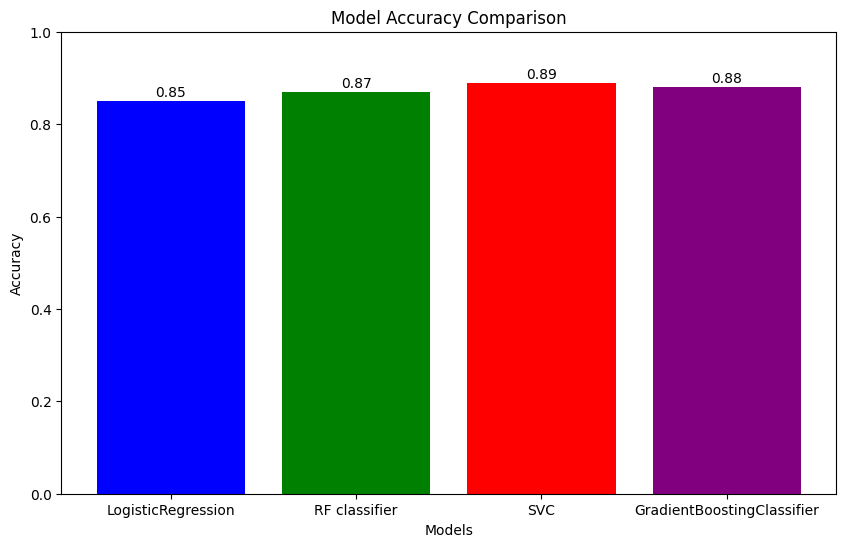

In [42]:
import matplotlib.pyplot as plt

# Define the model names and their corresponding accuracies
models = ['LogisticRegression', 'RF classifier', 'SVC', 'GradientBoostingClassifier']
accuracies = [.85, .87, .89, .88]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])

# Add titles and labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to 0 to 1

# Add accuracy values on top of the bars
for i in range(len(models)):
    plt.text(i, accuracies[i] + 0.01, f"{accuracies[i]:.2f}", ha='center')

# Show the plot
plt.show()
